In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline 

In [20]:
df = pd.read_csv('./Dataset/Complete Data/merged_data_16-24.csv')
df.head()

,date,water_level,precipitation,flood_occurred,precipitation_7days,precipitation_15days,precipitation_30days,water_level_t-1,water_level_t-2,precipitation_t-1,precipitation_t-2,precipitation_t-3,target_water_level,precipitation_t+1,precipitation_t+2,precipitation_t+3,precipitation_t+4,day,month,year
0,2016-01-01,9.3,0.0,False,0.0,0.0,0.0,9.3,9.3,0.0,0.0,0.0,9.3,0.0,0.0,0.0,0.0,1,1,2016
1,2016-01-02,9.3,0.0,False,0.0,0.0,0.0,9.3,9.3,0.0,0.0,0.0,9.3,0.0,0.0,0.0,0.0,2,1,2016
2,2016-01-03,9.3,0.0,False,0.0,0.0,0.0,9.3,9.3,0.0,0.0,0.0,9.3,0.0,0.0,0.0,0.0,3,1,2016
3,2016-01-04,9.3,0.0,False,0.0,0.0,0.0,9.3,9.3,0.0,0.0,0.0,9.3,0.0,0.0,0.0,0.0,4,1,2016
4,2016-01-05,9.3,0.0,False,0.0,0.0,0.0,9.3,9.3,0.0,0.0,0.0,9.3,0.0,0.0,0.0,0.0,5,1,2016


### Preprocessing of the dataset

### Training Model for water level 

In [21]:
# df = df.iloc[:3275].copy()

In [23]:
def model_training(data):
    X = data[['precipitation', 'water_level', 'precipitation_t-1', 'precipitation_t-2', 'precipitation_t-3', 'precipitation_7days', 'precipitation_15days', 'precipitation_30days', 'precipitation_t+1', 'precipitation_t+2', 'precipitation_t+3', 'precipitation_t+4', 'water_level_t-1', 'water_level_t-2']]
    y = data['target_water_level']

    X_train = X[(df['year'] >= 2018) & (df['year'] <= 2024)]
    y_train = y[(df['year'] >= 2018) & (df['year'] <= 2024)]

    X_test = X[(data['year'] >= 2016) & (data['year'] <= 2017)]
    y_test = y[(data['year'] >= 2016) & (data['year'] <= 2017)]

    # Train the model
    rf = RandomForestRegressor(random_state=42, max_depth=50, n_estimators=800)
    rf.fit(X_train, y_train)

    # Evaluate the model
    y_pred = rf.predict(X_test)
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R²:", r2_score(y_test, y_pred))

    return rf

rf = model_training(df)

MSE: 0.05224900816070436
R²: 0.7648801516344299


### Model Testing
*Providing model with fake precipitation data for model's prediction*

In [24]:
data_25 = pd.read_csv('./Dataset/Complete Data/merged_data_25.csv')
data_25.head()

,date,water_level,day,month,year,precipitation,precipitation_7days,precipitation_15days,precipitation_30days,water_level_t-1,water_level_t-2,precipitation_t-1,precipitation_t-2,precipitation_t-3,target_water_level,precipitation_t+1,precipitation_t+2,precipitation_t+3,precipitation_t+4
0,2025-01-01,8.282,1,1,2025,0.0,0.0,0.0,0.0,8.282,8.282,0.0,0.0,0.0,8.282,0.0,0.0,0.0,0.0
1,2025-01-02,8.282,2,1,2025,0.0,0.0,0.0,0.0,8.282,8.282,0.0,0.0,0.0,8.282,0.0,0.0,0.0,0.0
2,2025-01-03,8.282,3,1,2025,0.0,0.0,0.0,0.0,8.282,8.282,0.0,0.0,0.0,8.282,0.0,0.0,0.0,0.0
3,2025-01-04,8.282,4,1,2025,0.0,0.0,0.0,0.0,8.282,8.282,0.0,0.0,0.0,8.282,0.0,0.0,0.0,0.0
4,2025-01-05,8.282,5,1,2025,0.0,0.0,0.0,0.0,8.282,8.282,0.0,0.0,0.0,8.282,0.0,0.0,0.0,0.0


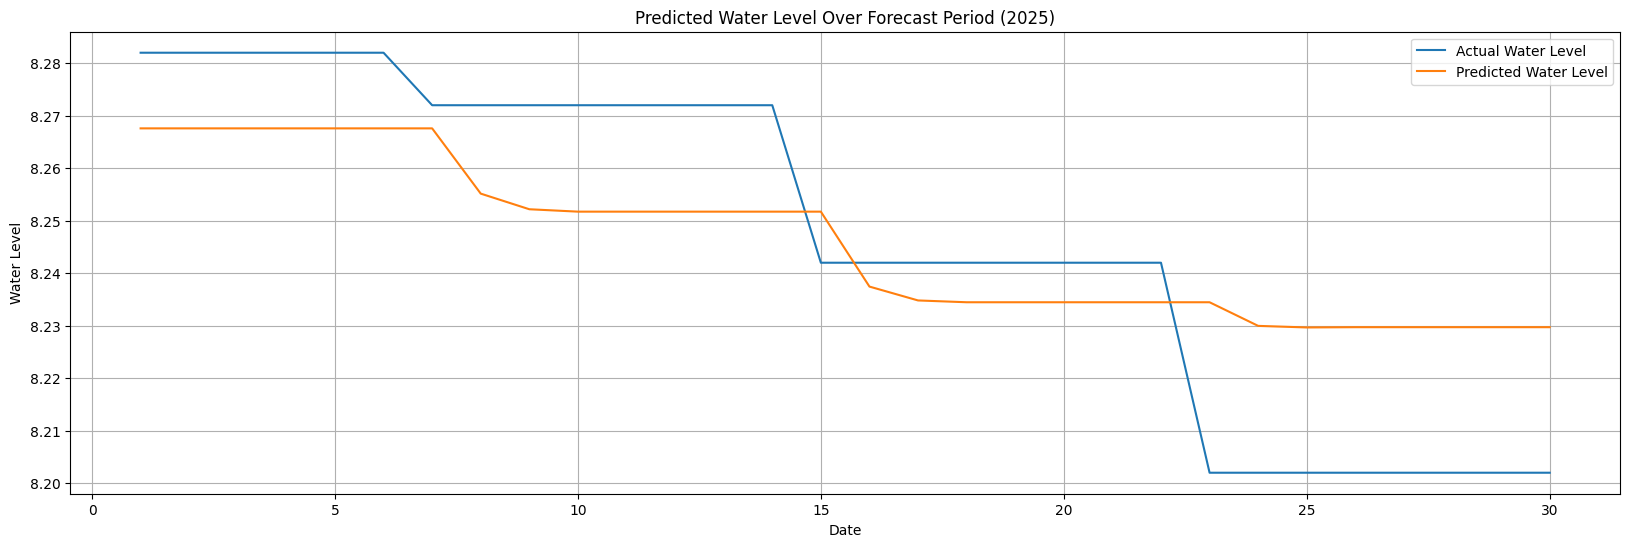

In [25]:
# forecast_data_2017 = df[(df['year'] == 2016)& (df['month'] >= 6) & (df['month'] <= 10)].copy()

X_forecast = data_25[['precipitation', 'water_level', 'precipitation_t-1', 'precipitation_t-2', 'precipitation_t-3', 'precipitation_7days', 'precipitation_15days', 'precipitation_30days', 'precipitation_t+1', 'precipitation_t+2', 'precipitation_t+3', 'precipitation_t+4', 'water_level_t-1', 'water_level_t-2']]

data_25['predicted_water_level'] = rf.predict(X_forecast)

plt.figure(figsize=(20, 6))
plt.plot(data_25['day'], data_25['target_water_level'], label='Actual Water Level')
plt.plot(data_25['day'], data_25['predicted_water_level'], label='Predicted Water Level')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.title('Predicted Water Level Over Forecast Period (2025)')
plt.grid()
plt.legend()
plt.show()

In [92]:
import pickle

# Save the model to a pickle file
with open("WL_randomForest_model.pkl", "wb") as file:
    pickle.dump(rf, file)

print("Model saved as WL_randomForest_model.pkl")


Model saved as WL_randomForest_model.pkl
